### Analyzing the Gender Pay Gap: PhD software engineers

Import libraries 

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as st 

Using Pandas to read csv

In [129]:
pay_gap_df = pd.read_csv('Glassdoor Gender Pay Gap.csv')

Reading first five rows of data

In [130]:
pay_gap_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


Printing information about the DataFrame

In [131]:
pay_gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Combining BasePay and Bonus to create TotalPay column 

In [132]:
pay_gap_df['TotalPay'] = pay_gap_df['BasePay'] + pay_gap_df['Bonus']

Viewing job titles 

In [133]:
print('Job Title:')
pay_gap_df.JobTitle.value_counts()

Job Title:


Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: JobTitle, dtype: int64

Viewing all education values

In [134]:
print('Education:')
pay_gap_df.Education.value_counts()

Education:


High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

Viewing just Software Engineers, dropping other values in JobTitle column

In [135]:
values = ['Marketing Associate', 'Financial Analyst','Graphic Designer','Warehouse Associate', 'Data Scientist'
, 'IT', 'Sales Associate', 'Driver', 'Manager']

pay_gap_df = pay_gap_df[pay_gap_df.JobTitle.isin(values) == False]

Viewing just PhD employees, dropping other values in Education column

In [136]:
values = ['Masters', 'High School','College']

pay_gap_df = pay_gap_df[pay_gap_df.Education.isin(values) == False]

Checking that values dropped

In [137]:
pay_gap_df.tail()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
776,Software Engineer,Male,62,2,PhD,Engineering,3,138184,4664,142848
796,Software Engineer,Female,36,1,PhD,Management,1,79177,3661,82838
804,Software Engineer,Male,64,2,PhD,Engineering,4,139068,4126,143194
806,Software Engineer,Male,55,2,PhD,Management,3,121910,4494,126404
932,Software Engineer,Male,60,1,PhD,Administration,4,127250,4263,131513


In [138]:
pay_gap_df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus,TotalPay
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,41.115385,3.423077,3.230769,110309.846154,7213.730769,117523.576923
std,15.958263,1.419100,1.422890,24173.020729,2173.493640,23613.123789
min,18.000000,1.000000,1.000000,68466.000000,3661.000000,76850.000000
25%,27.250000,2.000000,2.000000,89649.000000,4715.750000,98940.750000
50%,39.500000,4.000000,3.500000,107948.500000,7870.500000,116433.500000
75%,55.750000,5.000000,4.000000,131429.750000,8858.500000,138980.000000
max,64.000000,5.000000,5.000000,157277.000000,10240.000000,162121.000000


Calculated mean salary for PhD male and female software engineers. According to the calculations, men make on average $23,000 more than their female counterparts. 

In [139]:
gender_mean_salary = pay_gap_df.groupby(['Gender'], as_index=False).TotalPay.mean()
print(gender_mean_salary)

   Gender       TotalPay
0  Female   96535.333333
1    Male  120261.173913


Creating gender subsets: male and female 

In [140]:
male = pay_gap_df[pay_gap_df.Gender == 'Male']
female = pay_gap_df[pay_gap_df.Gender == 'Female']

Performing two-sample t-test

In [141]:
print(st.ttest_ind(male['TotalPay'], female['TotalPay']))

Ttest_indResult(statistic=1.69729446348793, pvalue=0.10257343563780903)


The larger the absolute value of the t-value, the smaller the p-value, and the greater the evidence against the null hypothesis. Reject the null hypothesis that means are same. 

<AxesSubplot:xlabel='Gender', ylabel='TotalPay'>

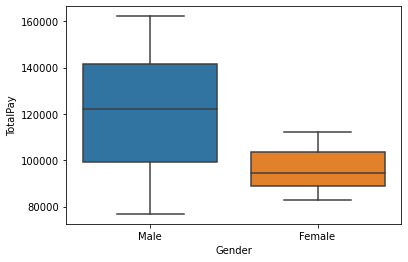

In [142]:
sns.boxplot(x='Gender', y='TotalPay', data=pay_gap_df)

A boxplot graph to show how data is spread out among the PhD Male and Female software engineers. 